In [10]:


import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
with open('movie_data.txt') as json_file:
    data = json.load(json_file)

data['1999']['The Sixth Sense']['Genre']

'Drama, Mystery, Thriller'

In [12]:
Directors = {}
Director_list = []
Director_list_all = []
Director_box = {}

for year in list(data.keys()):
    movies = list(data[year].keys())
    Director_list = []
    boxes = []
    for movie in movies:
        try:
            Director = data[year][movie]['Director'].split(', ')
            box = data[year][movie]['BoxOffice']
            box_vals=[]
            for i in Director:
                Director_list.append(i)
                boxes.append(box)
                Director_list_all.append(i)
                
        except Exception as e:
            print(str(e)+" Year: "+year+" Movie: "+movie)
    Directors[year] = Director_list
    Director_box[year] = boxes
    
dir_df={}
for year in list(data.keys()):
    dirbox={}
    for i in range(len(Director_box[year])):
        
        if Directors[year][i] not in list(dirbox.keys()):
            dirbox[Directors[year][i]] = [Director_box[year][i]]
        else:
            dirbox[Directors[year][i]].append(Director_box[year][i])
    dir_df[year] = dirbox

for y in list(dir_df.keys()):
    for dir in list(dir_df[y].keys()):
        dir_df[y][dir] = {'box_total': sum(dir_df[y][dir]),
                      'movie_director_count': len(dir_df[y][dir]),
                      'box_per_movie': sum(dir_df[y][dir])/len(dir_df[y][dir])}

# Example
dir_df['2002'] 
    
    

{'Sam Raimi': {'box_total': 407022860,
  'movie_director_count': 1,
  'box_per_movie': 407022860.0},
 'George Lucas': {'box_total': 310676740,
  'movie_director_count': 1,
  'box_per_movie': 310676740.0},
 'Chris Columbus': {'box_total': 262450136,
  'movie_director_count': 1,
  'box_per_movie': 262450136.0},
 'M. Night Shyamalan': {'box_total': 227966634,
  'movie_director_count': 1,
  'box_per_movie': 227966634.0},
 'Joel Zwick': {'box_total': 241438208,
  'movie_director_count': 1,
  'box_per_movie': 241438208.0},
 'Peter Jackson': {'box_total': 342551365,
  'movie_director_count': 1,
  'box_per_movie': 342551365.0},
 'Jay Roach': {'box_total': 213307889,
  'movie_director_count': 1,
  'box_per_movie': 213307889.0},
 'Barry Sonnenfeld': {'box_total': 193735288,
  'movie_director_count': 1,
  'box_per_movie': 193735288.0},
 'Chris Wedge': {'box_total': 176387405,
  'movie_director_count': 1,
  'box_per_movie': 176387405.0},
 'Carlos Saldanha': {'box_total': 176387405,
  'movie_direct

In [13]:
unique_directors = pd.Series(Director_list_all).unique()
unique_directors

box_val_time={}
for i in unique_directors:
    rev = []
    for year in list(dir_df.keys()):
        try:
            rev.append(dir_df[year][i]['box_per_movie'])
        except:
            rev.append(0)
    box_val_time[i] = rev

box_val_time["Oliver Stone"]

[0,
 2447576.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 34416893.0,
 0,
 0,
 50282766.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 70278893.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

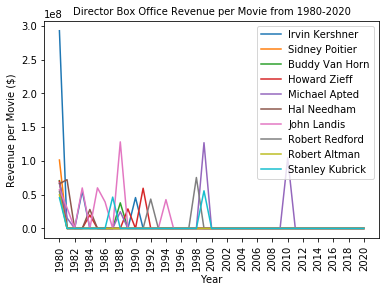

In [14]:
x_vals = list(dir_df.keys())
y_vals = []

for dir in unique_directors[:10]:
    y_vals = box_val_time[dir]
    plt.plot(x_vals,y_vals)

plt.xticks(np.arange(0, 42, step=2),rotation = 90)
plt.xlabel('Year')
plt.ylabel('Revenue per Movie ($)')
plt.legend(unique_directors[:10]);
plt.title('Director Box Office Revenue per Movie from 1980-2020',fontsize=10)
plt.show()

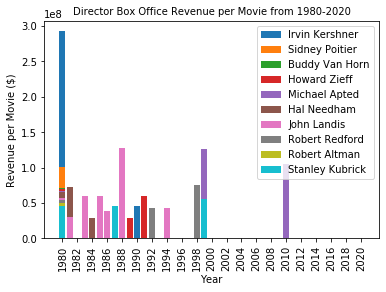

In [15]:
x_vals = list(dir_df.keys())
y_vals = []

for dir in unique_directors[:10]:
    y_vals = box_val_time[dir]
    plt.bar(x_vals,y_vals)

plt.xticks(np.arange(0, 42, step=2),rotation = 90)
plt.xlabel('Year')
plt.ylabel('Revenue per Movie ($)')
plt.legend(unique_directors[:10]);
plt.title('Director Box Office Revenue per Movie from 1980-2020',fontsize=10)
plt.show()